In [20]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


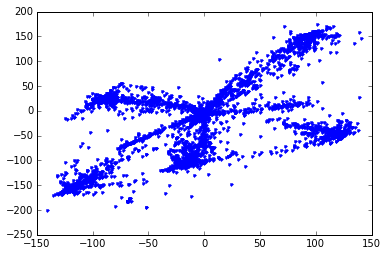

In [30]:
f = open('d:\p.txt')
x = []
y = []
for line in f.readlines():
    p = line.replace('(','').replace(')','').replace('\n','').split(',')
    x.append(int(p[0])/100)
    y.append(int(p[1])/100)
f.close()
plot(x,y,'.')

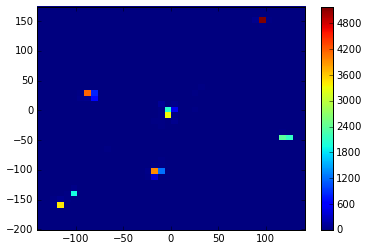

In [42]:
from matplotlib.colors import LogNorm
#hist2d(x, y, bins=40, norm=LogNorm())
hist2d(x, y, bins=40)
colorbar()
show()

In [38]:
from sklearn.cluster import MiniBatchKMeans, KMeans
import numpy as np
k_means = KMeans(init='k-means++', n_clusters=6)
data = array([x,y]).T
k_means.fit(data)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=6, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

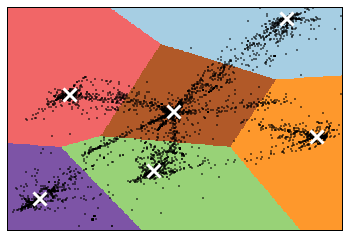

In [43]:
# Step size of the mesh. Decrease to increase the quality of the VQ.
h = 1     # point in the mesh [x_min, m_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = data[:, 0].min() + 1, data[:, 0].max() - 1
y_min, y_max = data[:, 1].min() + 1, data[:, 1].max() - 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = k_means.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(data[:, 0], data[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = k_means.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

In [44]:
centroids

array([[  93.53772622,  151.93638933],
       [ -17.54040123, -101.41988675],
       [ -87.86378427,   25.91097952],
       [ 118.8733442 ,  -43.85132179],
       [-112.49430466, -147.50353961],
       [  -1.04022727,   -2.59401229]])